Loaded dataset: 500 rows, 14 columns
Missing values handled.
Outliers removed. Remaining rows: 405


,Customer_ID,Age,Gender,Income,Spending_Score,Credit_Score,Loan_Amount,Previous_Defaults,Marketing_Spend,Purchase_Frequency,Seasonality,Sales,Customer_Churn,Defaulted
0,1,56,Female,142418.000000,7,391.000000,8083.000000,1,15376,3,Low,32526,0,0
1,2,69,Male,63088.000000,82,652.000000,34328.000000,2,6889,6,Low,78493,0,0
2,3,46,Male,136868.000000,91,662.000000,47891.000000,2,6054,29,Medium,57198,1,0
3,4,32,Female,84398.055556,34,644.000000,25103.000000,2,4868,8,Medium,48395,0,0
4,5,60,Male,59811.000000,91,469.000000,44891.000000,1,17585,12,High,29031,1,0
5,6,25,Male,134825.000000,17,655.000000,15754.000000,1,19881,13,Low,80542,0,0
6,8,56,Male,84398.055556,59,721.000000,20901.000000,2,11058,12,Medium,30939,1,0
7,9,36,Male,107369.000000,51,306.000000,38004.000000,1,10101,1,Medium,54145,0,0
8,11,28,Female,39963.000000,24,330.000000,42211.000000,0,5658,16,Medium,27867,0,0
9,14,53,Male,122468.000000,52,693.000000,46323.000000,0,8718,18,Low,20899,0,0


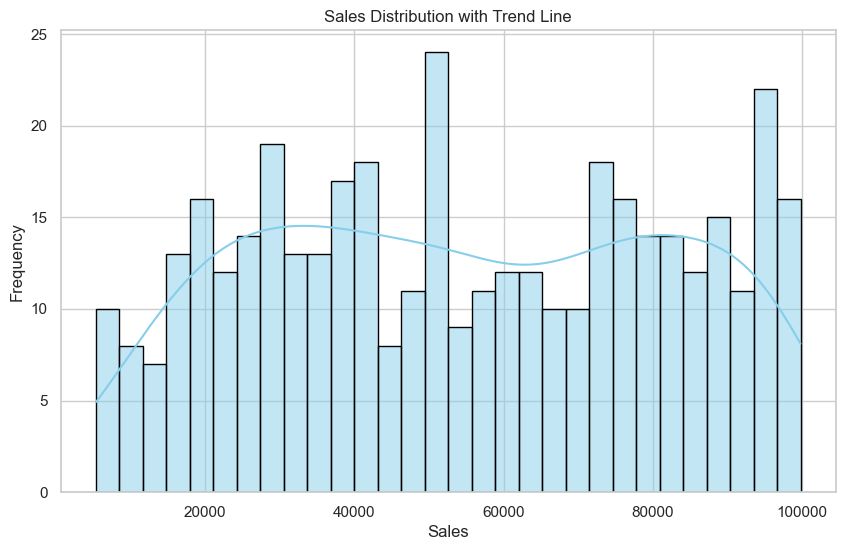

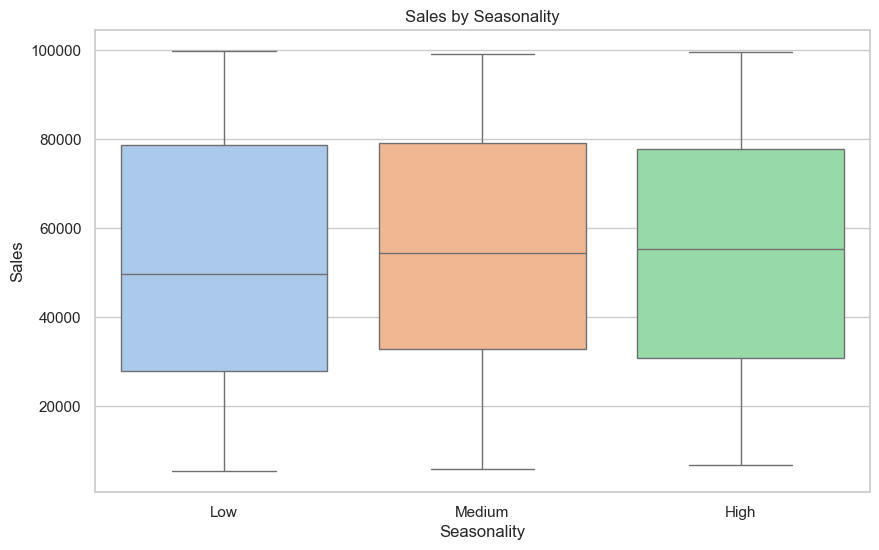

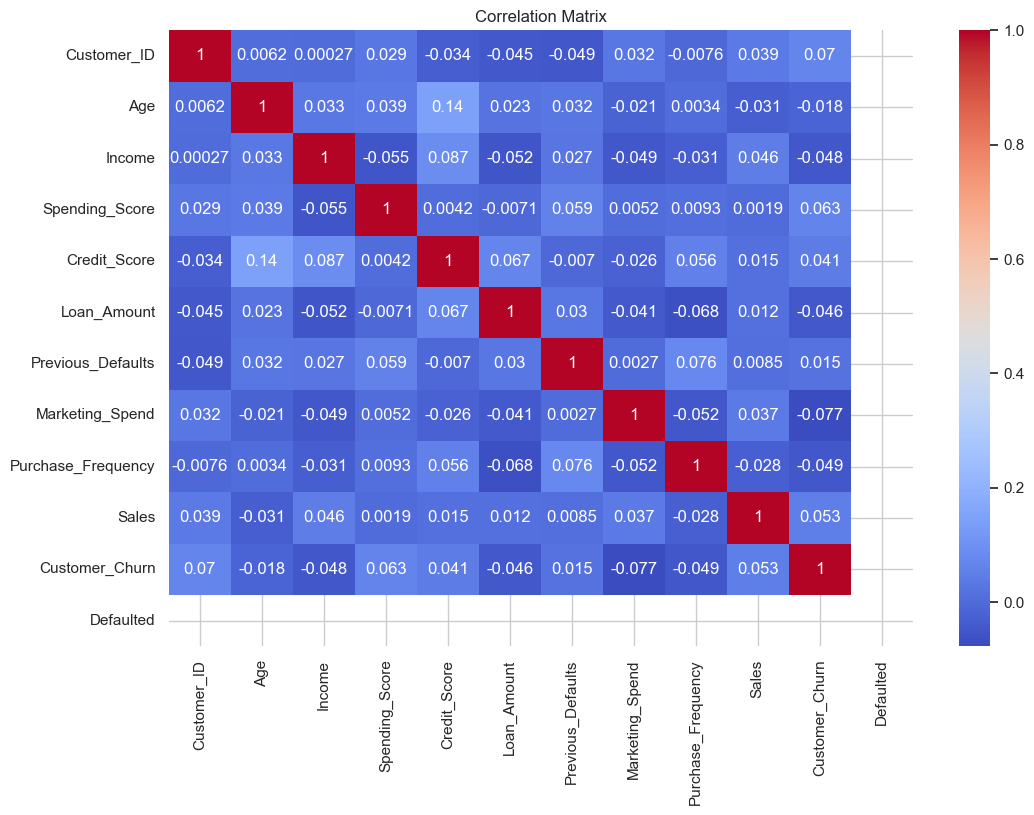

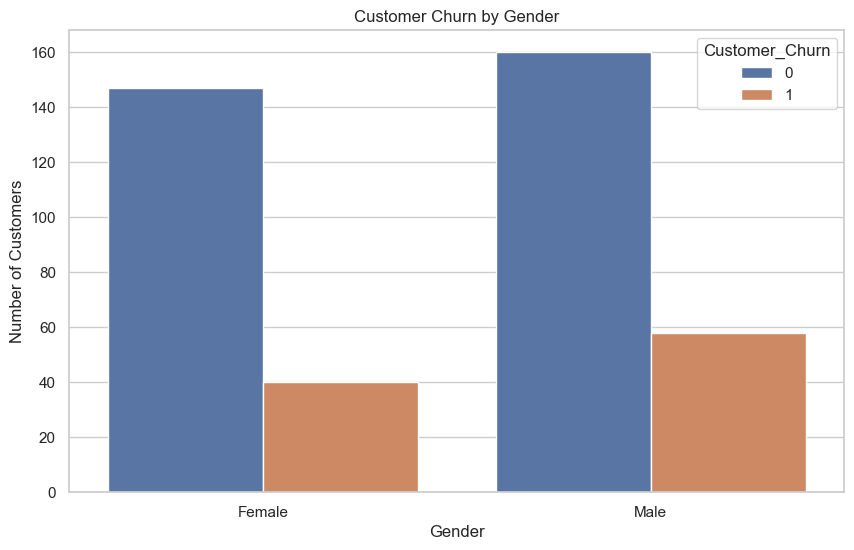

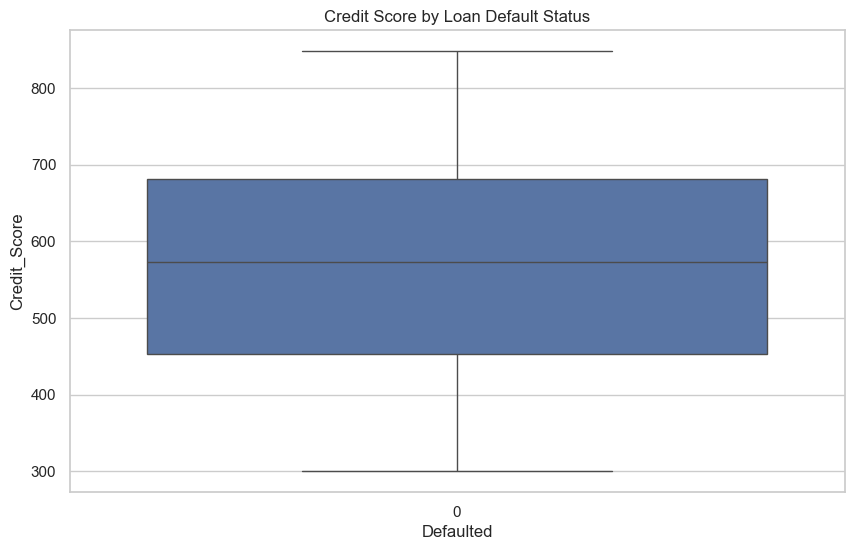


=== Linear Regression Model: Sales → Spending_Score ===
Intercept: 51.20
Coefficient: -0.00
R² Score: -0.00
Mean Squared Error: 842.03

=== Columns for Multivariable Regression ===
['Customer_ID', 'Age', 'Gender', 'Income', 'Spending_Score', 'Credit_Score', 'Loan_Amount', 'Previous_Defaults', 'Marketing_Spend', 'Purchase_Frequency', 'Seasonality', 'Sales', 'Customer_Churn', 'Defaulted']
3/3 [==============================] - 0s 3ms/step

=== TensorFlow Regression Model: Marketing_Spend + Seasonality → Sales ===
R² Score: -0.80
Mean Squared Error: 1323289984.00


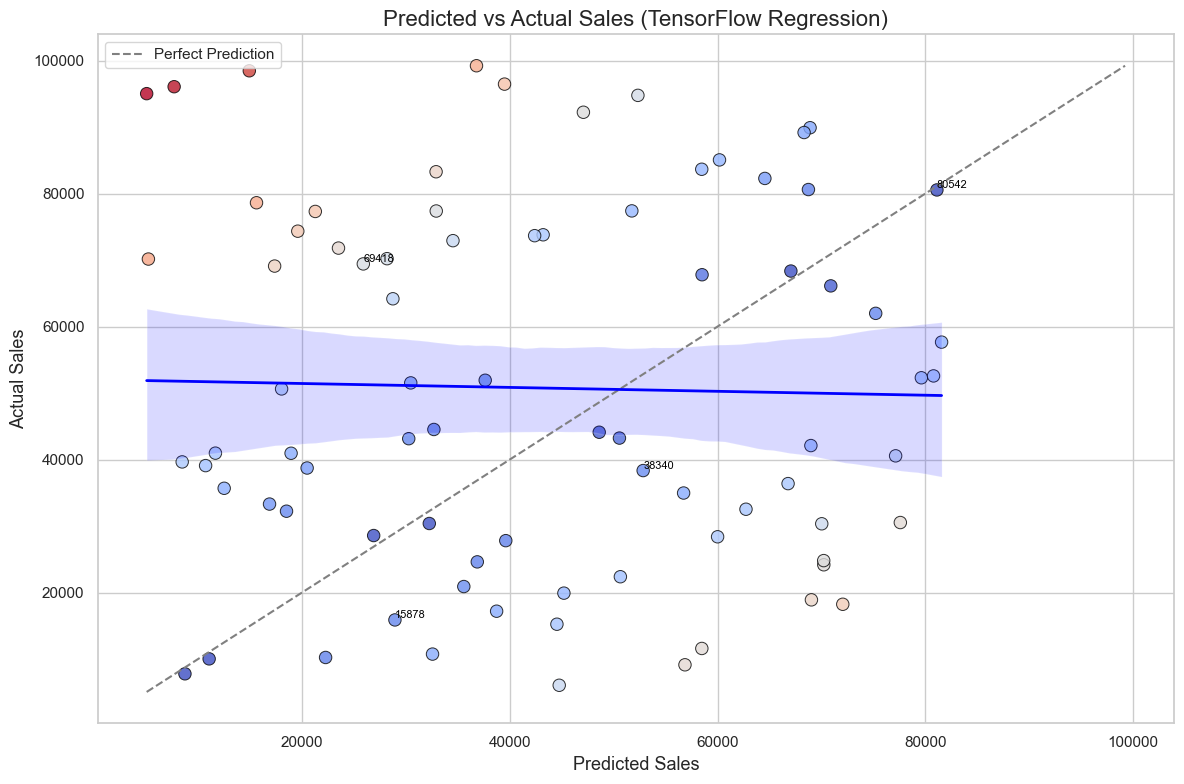

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from IPython.display import display
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

warnings.filterwarnings("ignore")  # Suppress warnings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# === Load Dataset ===
df = pd.read_csv(r"C:\Users\angel\OneDrive\Documents\raw_dataset_week4.csv")
print(f"Loaded dataset: {df.shape[0]} rows, {df.shape[1]} columns")

# === Handle Missing Values ===
df_numeric = df.select_dtypes(include=[np.number])
df[df_numeric.columns] = df_numeric.fillna(df_numeric.mean())

df_categorical = df.select_dtypes(include=['object'])
for col in df_categorical.columns:
    df[col] = df[col].fillna(df[col].mode()[0])

print("Missing values handled.")

# === Remove Outliers Using IQR ===
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1
df_cleaned = df[~((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))).any(axis=1)].copy()
df_cleaned.reset_index(drop=True, inplace=True)

print(f"Outliers removed. Remaining rows: {df_cleaned.shape[0]}")

# === Display Cleaned Table ===
display(df_cleaned)

# === 1. Sales Distribution with KDE Trend Line ===
if 'Sales' in df_cleaned.columns:
    sns.histplot(df_cleaned['Sales'], kde=True, bins=30, color='skyblue', edgecolor='black')
    plt.title("Sales Distribution with Trend Line")
    plt.xlabel("Sales")
    plt.ylabel("Frequency")
    plt.show()

# === 2. Sales by Seasonality ===
if {'Seasonality', 'Sales'}.issubset(df_cleaned.columns):
    sns.boxplot(x='Seasonality', y='Sales', data=df_cleaned, palette='pastel')
    plt.title("Sales by Seasonality")
    plt.show()

# === 3. Correlation Heatmap ===
plt.figure(figsize=(12, 8))
sns.heatmap(df_cleaned.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# === 4. Customer Churn by Gender ===
if {'Gender', 'Customer_Churn'}.issubset(df_cleaned.columns):
    sns.countplot(x='Gender', hue='Customer_Churn', data=df_cleaned)
    plt.title("Customer Churn by Gender")
    plt.ylabel("Number of Customers")
    plt.show()

# === 5. Credit Score by Loan Default Status ===
if {'Defaulted', 'Credit_Score'}.issubset(df_cleaned.columns):
    sns.boxplot(x='Defaulted', y='Credit_Score', data=df_cleaned)
    plt.title("Credit Score by Loan Default Status")
    plt.show()

# === 6. Linear Regression: Sales → Spending_Score ===
if {'Sales', 'Spending_Score'}.issubset(df_cleaned.columns):
    X = df_cleaned[['Sales']]
    y = df_cleaned['Spending_Score']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    lin_model = LinearRegression()
    lin_model.fit(X_train, y_train)
    y_pred = lin_model.predict(X_test)
    
    print("\n=== Linear Regression Model: Sales → Spending_Score ===")
    print(f"Intercept: {lin_model.intercept_:.2f}")
    print(f"Coefficient: {lin_model.coef_[0]:.2f}")
    print(f"R² Score: {r2_score(y_test, y_pred):.2f}")
    print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")

# === 7. TensorFlow Regression: Marketing_Spend + Seasonality → Sales ===
required_cols = {'Marketing_Spend', 'Seasonality', 'Sales'}
print("\n=== Columns for Multivariable Regression ===")
print(df_cleaned.columns.tolist())

if required_cols.issubset(df_cleaned.columns):
    if df_cleaned['Seasonality'].dtype == 'object':
        df_cleaned['Seasonality'] = LabelEncoder().fit_transform(df_cleaned['Seasonality'])

    X = df_cleaned[['Marketing_Spend', 'Seasonality']]
    y = df_cleaned['Sales']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Build TensorFlow Model
    model = Sequential([
        Dense(32, input_dim=X.shape[1], activation='relu'),
        Dense(16, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=50, verbose=0)

    predictions_tf = model.predict(X_test).flatten()

    print("\n=== TensorFlow Regression Model: Marketing_Spend + Seasonality → Sales ===")
    print(f"R² Score: {r2_score(y_test, predictions_tf):.2f}")
    print(f"Mean Squared Error: {mean_squared_error(y_test, predictions_tf):.2f}")

    # === 8. Scatter Plot: Predicted vs Actual Sales (TensorFlow) ===
    plt.figure(figsize=(12, 8))
    min_val = min(min(predictions_tf), min(y_test))
    max_val = max(max(predictions_tf), max(y_test))
    plt.plot([min_val, max_val], [min_val, max_val], linestyle='--', color='gray', linewidth=1.5, label='Perfect Prediction')

    sns.scatterplot(x=predictions_tf, y=y_test, hue=abs(y_test - predictions_tf),
                    palette='coolwarm', edgecolor='black', s=80, alpha=0.8, legend=False)

    sns.regplot(x=predictions_tf, y=y_test, scatter=False, color='blue',
                line_kws={"linewidth": 2, "label": f"R² = {r2_score(y_test, predictions_tf):.2f}"})

    for i in range(0, len(predictions_tf), 25):
        plt.text(predictions_tf[i], y_test.iloc[i], f"{round(y_test.iloc[i])}", fontsize=8,
                 ha='left', va='bottom', color='black')

    plt.title("Predicted vs Actual Sales (TensorFlow Regression)", fontsize=16)
    plt.xlabel("Predicted Sales", fontsize=13)
    plt.ylabel("Actual Sales", fontsize=13)
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("Missing columns for TensorFlow regression:", required_cols - set(df_cleaned.columns))


In [38]:
# Export the cleaned dataset
df_cleaned.to_csv(r"C:\Users\angel\OneDrive\Documents\cleaned_dataset_week4.csv", index=False)